## Створюємо молель на основі Випадкових лісів

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
db = load_diabetes()
X = np.array(db.data)
y = np.array(db.target)

# print(f"X = {X}")
# print(f"y = {y}")

print(f"Data shape: кількість вхідних значень={X.shape} кількість результатів={y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f"беремо для тренування: {np.array(X_train).shape} а для перевірки: {np.array(X_test).shape}")

Data shape: кількість вхідних значень=(442, 10) кількість результатів=(442,)
беремо для тренування: (331, 10) а для перевірки: (111, 10)


In [28]:
# Set the model parameters.
n_estimators = 200
max_depth = 7
max_features = 4
  
# Create and train model.
rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
print(f"Пуста модель виапдкових лісів з параметрами: {rf}")

rf.fit(X_train, y_train)

print(f"Модель після тренування: {rf}")
  
# Use the model to make predictions on the test dataset.
predictions = rf.predict(X_test)

print(f"При вхідних даних {X_test[:2, :]} маємо передбаченя: {predictions[:2]}")

Пуста модель виапдкових лісів з параметрами: RandomForestRegressor(max_depth=7, max_features=4, n_estimators=200)
Модель після тренування: RandomForestRegressor(max_depth=7, max_features=4, n_estimators=200)
При вхідних даних [[ 0.01628068 -0.04464164  0.02397278 -0.02288468 -0.02496016 -0.02605261
  -0.03235593 -0.00259226  0.03723625  0.03205916]
 [ 0.01628068  0.05068012  0.01427248  0.00121528  0.00118295 -0.02135538
  -0.03235593  0.03430886  0.07496573  0.04034337]] маємо передбаченя: [191.53601082 209.39189055]


In [29]:
# Оцінюємо точність
mse = mean_squared_error(y_test, predictions)
print(f"Середньоквадратична помилка (MSE): {mse:.4f}")

rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

mean_y_true = np.mean(np.abs(y_train))  # Середнє абсолютне значення справжніх даних
rmspe = (rmse / mean_y_true) * 100  # Відносна похибка у відсотках
print(f"RMSPE: {rmspe:.2f}%")

Середньоквадратична помилка (MSE): 3167.3243
RMSE: 56.27898596073157
RMSPE: 37.53%


In [30]:
X_grid = np.linspace(np.min(X), np.max(X), 1000).reshape(100, 10)
print(X_grid[:3])
y_grid_pred = rf.predict(X_grid)

[[-0.13776723 -0.13743033 -0.13709344 -0.13675655 -0.13641966 -0.13608277
  -0.13574587 -0.13540898 -0.13507209 -0.1347352 ]
 [-0.1343983  -0.13406141 -0.13372452 -0.13338763 -0.13305074 -0.13271384
  -0.13237695 -0.13204006 -0.13170317 -0.13136628]
 [-0.13102938 -0.13069249 -0.1303556  -0.13001871 -0.12968182 -0.12934492
  -0.12900803 -0.12867114 -0.12833425 -0.12799735]]


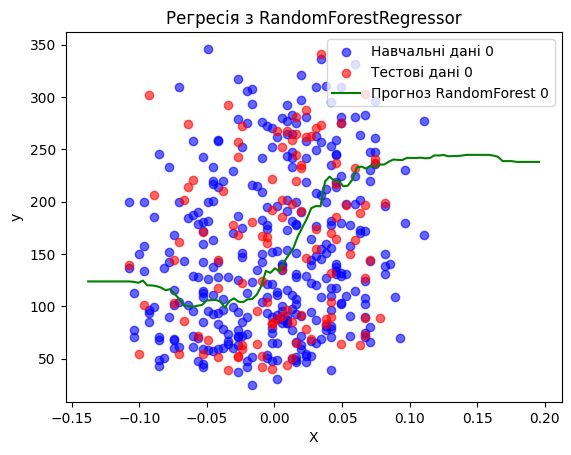

In [31]:
# Візуалізація
f = 0
plt.scatter(X_train[:, f], y_train, label=f"Навчальні дані {f}", color="blue", alpha=0.6)
plt.scatter(X_test[:, f], y_test, label=f"Тестові дані {f}", color="red", alpha=0.6)
plt.plot(X_grid[:, f], y_grid_pred, label=f"Прогноз RandomForest {f}", color="green")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Регресія з RandomForestRegressor")
plt.show()